In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

In [4]:
jl = df[(df["trx_family_code"]=="FRMLN")&(df["trx_type_code"]==3247)]

Let's check everything went as expected.

In [8]:
jl["trx_type_desc"].unique()

array(['Joint liability loan'], dtype=object)

In [9]:
jl["account_bsheet_desig"].unique()

array(['Liability'], dtype=object)

In [7]:
len(jl["account_ids"].unique())

21

In [14]:
jl["m_ids_owner"].unique()

array(['61134406652800000', '57134407687800000', '57134339147100000',
       '57134381707600000', '61134406243400000', '61134364505100000',
       '59134381215900000', '57134364414700000', '61134442496500000',
       '61134458558400000', '61134382134100000', '61134470104500000',
       '61134381034300000', '61134491524800000', '61134479318400000',
       '79134829266800000', '62134347056700000', '56134388724900000',
       '61134394294700000', '61134553127800000', '64134399713800000'],
      dtype=object)

### None of them seems to be household loans

## Interests?

In [15]:
len(jl[jl["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

9

### Only interests in 9 out of 21 loans joint liability loans.

## What other purposes.

In [17]:
jl["trx_prx_purpose"].unique()

array(['6. Closing Balance--End of last DQ',
       '1. Starting balance (today)', '5. Interest accruing',
       '3. Payments', '2. New borrowinng (individual portion)',
       'DECREASE--Unexplained balance adjustment',
       'INCREASE--Unexplained balance adjustment', '4. Any known fees'],
      dtype=object)

In [41]:
len(jl[jl["trx_prx_purpose"]=="2. New borrowinng (individual portion)"]["account_ids"].unique())

6

### Again there are new borrowings, and what is individual portion supposed to mean?

In [20]:
len(jl[jl["trx_prx_purpose"]=="1. Starting balance (today)"]["account_ids"].unique())

18

In [21]:
len(jl[jl["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment"]["account_ids"].unique())

2

In [22]:
len(jl[jl["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment"]["account_ids"].unique())

2

In [23]:
len(jl[(jl["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")|(jl["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["account_ids"].unique())

2

### Only two accounts to be discarded because of unexplained balance adjustments.

In [25]:
len(jl[jl["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique())

17

### 2 accounts don't have a closing balance.

In [26]:
clos_bal = []
for acc in jl[jl["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique():
    clos = jl[(jl["trx_prx_purpose"]=="6. Closing Balance--End of last DQ")&(jl["account_ids"]==acc)]["trx_value_kes"]
    clos_bal.append(clos.values[0])

In [27]:
clos_bal

[51200.0,
 4500.0,
 0.0,
 0.0,
 0.0,
 55000.0,
 0.0,
 5000.0,
 0.0,
 48750.0,
 74880.0,
 -3500.0,
 20065.0,
 15000.0,
 0.0,
 19720.0,
 12500.0]

## Look at one single account

In [28]:
acc = random.choice(jl["account_ids"].unique())

In [29]:
print(acc)

56134756074400000


acc = 56134756074400000

In [30]:
lna = jl[jl["account_ids"]==acc]

In [31]:
lna.shape

(16, 58)

In [32]:
lna.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
10294,KELDK19,NaN,08sep2012,07dec2013,455,15,06=Cleaning interview,26sep2013,9,2013,2013_09,30aug2012,56134756074400000,NaN,56134388724900000,NaN,Liability,NaN,Formal,NaN,29oct2012,25sep2013,331,11,105138433664500000,56134388724900000,15nov2012,11,2012,2012_11,17.0,68,2,17,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,33750.0,397.0588,0,NaN,NaN,NaN,2.344828
11691,KELDK19,NaN,08sep2012,07dec2013,455,15,04=Diaries Interview,25sep2013,9,2013,2013_09,30aug2012,56134756074400000,NaN,56134388724900000,NaN,Liability,Close,Formal,NaN,29oct2012,25sep2013,331,11,105138009211500000,56134388724900000,25sep2013,9,2013,2013_09,16.0,382,13,331,11,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,48750.0,573.5294,0,NaN,NaN,NaN,13.172410
21980,KELDK19,NaN,08sep2012,07dec2013,455,15,06=Cleaning interview,26sep2013,9,2013,2013_09,30aug2012,56134756074400000,NaN,56134388724900000,NaN,Liability,Start,Formal,NaN,29oct2012,25sep2013,331,11,105138433647800000,56134388724900000,14nov2012,11,2012,2012_11,17.0,67,2,16,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,0.0,0.0000,0,NaN,NaN,NaN,2.310345
30068,KELDK19,NaN,08sep2012,07dec2013,455,15,04=Diaries Interview,06aug2013,8,2013,2013_08,30aug2012,56134756074400000,NaN,56134388724900000,NaN,Liability,NaN,Formal,NaN,29oct2012,25sep2013,331,11,105137579693900000,56134388724900000,22jul2013,7,2013,2013_07,13.0,317,10,266,9,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,12250.0,144.1176,0,NaN,NaN,NaN,10.931030
119994,KELDK19,NaN,08sep2012,07dec2013,455,15,04=Diaries Interview,16may2013,5,2013,2013_05,30aug2012,56134756074400000,NaN,56134388724900000,NaN,Liability,NaN,Formal,NaN,29oct2012,25sep2013,331,11,105136867854900000,56134388724900000,10may2013,5,2013,2013_05,8.0,244,8,193,6,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,3247,Joint liability loan,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,12250.0,144.1176,0,NaN,NaN,NaN,8.413794


In [33]:
lna = lna.sort_values("trx_stdtime_days_acc")

In [34]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [35]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index)+ ":" + row["trx_prx_purpose"])

Error neither increase nor decrease at index11691:6. Closing Balance--End of last DQ


In [36]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [37]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s
lna[["account_ids","trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,account_ids,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
435589,56134756074400000,0,27500.0,3. Payments,Outflow,Decrease,-27500.0,-27500.0
21980,56134756074400000,16,0.0,1. Starting balance (today),NaN,Increase,0.0,-27500.0
10294,56134756074400000,17,33750.0,5. Interest accruing,NaN,Increase,33750.0,6250.0
434432,56134756074400000,17,150000.0,2. New borrowinng (individual portion),Inflow,Increase,150000.0,156250.0
461219,56134756074400000,32,12250.0,3. Payments,Outflow,Decrease,-12250.0,144000.0
461282,56134756074400000,62,12250.0,3. Payments,Outflow,Decrease,-12250.0,131750.0
217583,56134756074400000,93,12250.0,3. Payments,Outflow,Decrease,-12250.0,119500.0
155446,56134756074400000,122,12250.0,3. Payments,Outflow,Decrease,-12250.0,107250.0
342614,56134756074400000,152,12250.0,3. Payments,Outflow,Decrease,-12250.0,95000.0
311901,56134756074400000,179,12250.0,3. Payments,Outflow,Decrease,-12250.0,82750.0


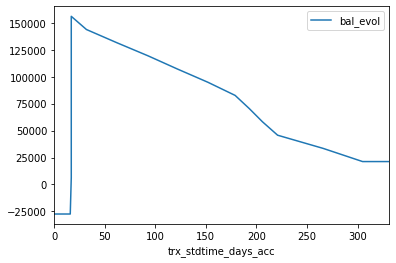

In [38]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's now use a for-loop to get the graphs for all joint liability loans.

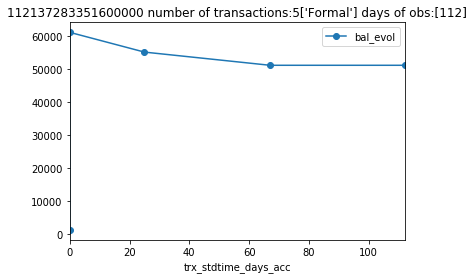

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
20371,286,0,4. Any known fees,Increase,NaN,1200.0,1200.0,1200.0
443714,286,0,2. New borrowinng (individual portion),Increase,Inflow,60000.0,60000.0,61200.0
236977,311,25,3. Payments,Decrease,Outflow,6000.0,-6000.0,55200.0
320008,353,67,3. Payments,Decrease,Outflow,4000.0,-4000.0,51200.0
252,398,112,6. Closing Balance--End of last DQ,NaN,NaN,51200.0,0.0,51200.0


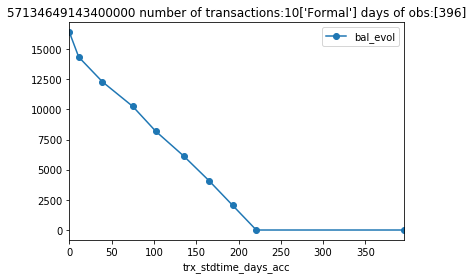

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
856,0,0,1. Starting balance (today),Increase,NaN,16400.0,16400.0,16400.0
419771,11,11,3. Payments,Decrease,Outflow,2050.0,-2050.0,14350.0
44884,39,39,3. Payments,Decrease,Outflow,2050.0,-2050.0,12300.0
137007,75,75,3. Payments,Decrease,Outflow,2050.0,-2050.0,10250.0
151785,102,102,3. Payments,Decrease,Outflow,2050.0,-2050.0,8200.0
265609,135,135,3. Payments,Decrease,Outflow,2050.0,-2050.0,6150.0
345604,165,165,3. Payments,Decrease,Outflow,2050.0,-2050.0,4100.0
330223,193,193,3. Payments,Decrease,Outflow,2050.0,-2050.0,2050.0
364956,221,221,3. Payments,Decrease,Outflow,2050.0,-2050.0,0.0
20193,396,396,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


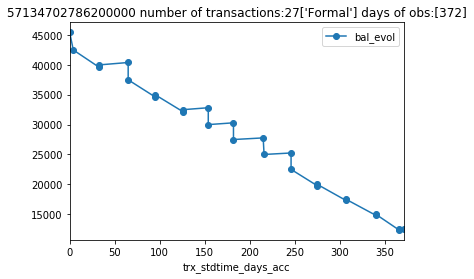

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
4949,20,0,1. Starting balance (today),Increase,NaN,45450.0,45450.0,45450.0
481985,24,4,3. Payments,Decrease,Outflow,2950.0,-2950.0,42500.0
473738,53,33,3. Payments,Decrease,Outflow,2925.0,-2925.0,39575.0
25914,53,33,5. Interest accruing,Increase,NaN,425.0,425.0,40000.0
1154,85,65,5. Interest accruing,Increase,NaN,400.0,400.0,40400.0
458526,85,65,3. Payments,Decrease,Outflow,2900.0,-2900.0,37500.0
457532,115,95,3. Payments,Decrease,Outflow,2875.0,-2875.0,34625.0
2968,115,95,5. Interest accruing,Increase,NaN,375.0,375.0,35000.0
457659,146,126,3. Payments,Decrease,Outflow,2850.0,-2850.0,32150.0
11887,146,126,5. Interest accruing,Increase,NaN,350.0,350.0,32500.0


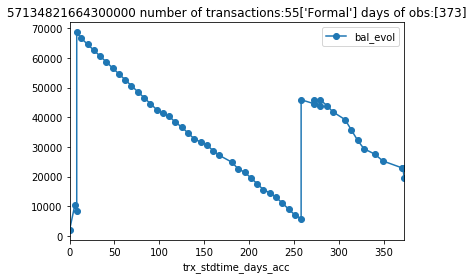

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
6203,13,0,1. Starting balance (today),Increase,NaN,2055.0,2055.0,2055.0
24024,19,6,5. Interest accruing,Increase,NaN,8565.0,8565.0,10620.0
254723,21,8,3. Payments,Decrease,Outflow,2000.0,-2000.0,8620.0
475549,21,8,2. New borrowinng (individual portion),Increase,Inflow,60000.0,60000.0,68620.0
263918,26,13,3. Payments,Decrease,Outflow,2000.0,-2000.0,66620.0
332026,33,20,3. Payments,Decrease,Outflow,2000.0,-2000.0,64620.0
32110,40,27,3. Payments,Decrease,Outflow,2000.0,-2000.0,62620.0
101129,47,34,3. Payments,Decrease,Outflow,2000.0,-2000.0,60620.0
302408,54,41,3. Payments,Decrease,Outflow,2000.0,-2000.0,58620.0
335630,61,48,3. Payments,Decrease,Outflow,2000.0,-2000.0,56620.0


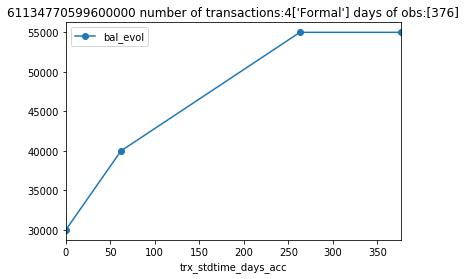

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
5449,22,0,1. Starting balance (today),Increase,NaN,30000.0,30000.0,30000.0
1664,84,62,5. Interest accruing,Increase,NaN,10000.0,10000.0,40000.0
5769,285,263,1. Starting balance (today),Increase,NaN,15000.0,15000.0,55000.0
19694,398,376,6. Closing Balance--End of last DQ,NaN,NaN,15000.0,0.0,55000.0


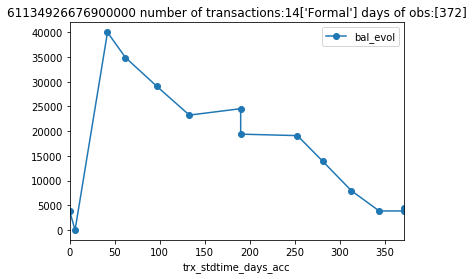

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
15634,9,0,1. Starting balance (today),Increase,NaN,3800.0,3800.0,3800.0
456561,15,6,3. Payments,Decrease,Outflow,3800.0,-3800.0,0.0
159059,51,42,2. New borrowinng (individual portion),Increase,Inflow,40000.0,40000.0,40000.0
456506,71,62,3. Payments,Decrease,Outflow,5100.0,-5100.0,34900.0
288622,106,97,3. Payments,Decrease,Outflow,5850.0,-5850.0,29050.0
456552,142,133,3. Payments,Decrease,Outflow,5800.0,-5800.0,23250.0
289960,199,190,5. Interest accruing,Increase,NaN,1300.0,1300.0,24550.0
329456,199,190,3. Payments,Decrease,Outflow,5150.0,-5150.0,19400.0
337981,262,253,3. Payments,Decrease,Outflow,300.0,-300.0,19100.0
443671,290,281,3. Payments,Decrease,Outflow,5150.0,-5150.0,13950.0


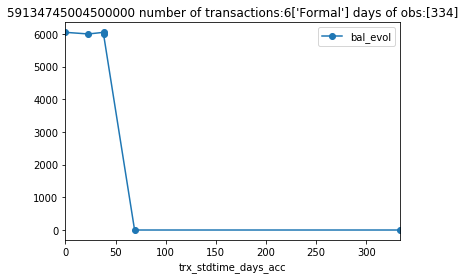

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
6877,71,0,1. Starting balance (today),Increase,NaN,6050.0,6050.0,6050.0
359434,94,23,3. Payments,Decrease,Outflow,50.0,-50.0,6000.0
5116,109,38,5. Interest accruing,Increase,NaN,50.0,50.0,6050.0
195012,109,38,3. Payments,Decrease,Outflow,50.0,-50.0,6000.0
358262,140,69,3. Payments,Decrease,Outflow,6000.0,-6000.0,0.0
3402,405,334,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


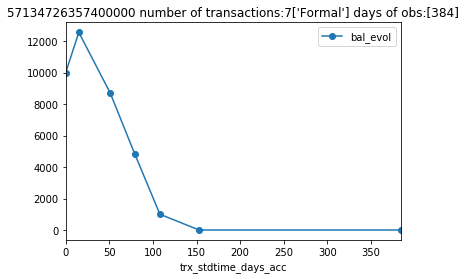

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
15869,0,0,1. Starting balance (today),Increase,NaN,10000.0,10000.0,10000.0
20399,15,15,4. Any known fees,Increase,NaN,2550.0,2550.0,12550.0
37144,51,51,3. Payments,Decrease,Outflow,3850.0,-3850.0,8700.0
475799,79,79,3. Payments,Decrease,Outflow,3850.0,-3850.0,4850.0
472619,108,108,3. Payments,Decrease,Outflow,3850.0,-3850.0,1000.0
72473,153,153,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
3505,384,384,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


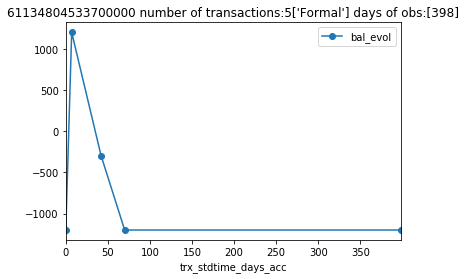

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
61236,7,0,3. Payments,Decrease,Outflow,1200.0,-1200.0,-1200.0
5538,14,7,1. Starting balance (today),Increase,NaN,2400.0,2400.0,1200.0
335264,49,42,3. Payments,Decrease,Outflow,1500.0,-1500.0,-300.0
125791,77,70,3. Payments,Decrease,Outflow,900.0,-900.0,-1200.0
5228,405,398,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,-1200.0


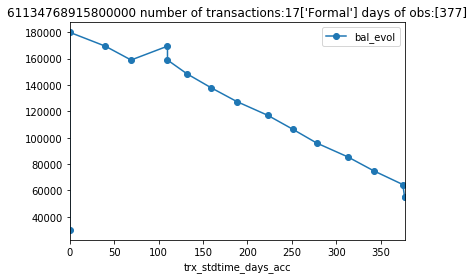

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
12711,7,0,5. Interest accruing,Increase,NaN,30000.0,30000.0,30000.0
475030,7,0,2. New borrowinng (individual portion),Increase,Inflow,150000.0,150000.0,180000.0
399296,47,40,3. Payments,Decrease,Outflow,10500.0,-10500.0,169500.0
197318,76,69,3. Payments,Decrease,Outflow,10500.0,-10500.0,159000.0
469338,117,110,2. New borrowinng (individual portion),Increase,Inflow,10500.0,10500.0,169500.0
469232,117,110,3. Payments,Decrease,Outflow,10500.0,-10500.0,159000.0
285916,139,132,3. Payments,Decrease,Outflow,10500.0,-10500.0,148500.0
285905,166,159,3. Payments,Decrease,Outflow,10500.0,-10500.0,138000.0
477942,195,188,3. Payments,Decrease,Outflow,10500.0,-10500.0,127500.0
135604,230,223,3. Payments,Decrease,Outflow,10500.0,-10500.0,117000.0


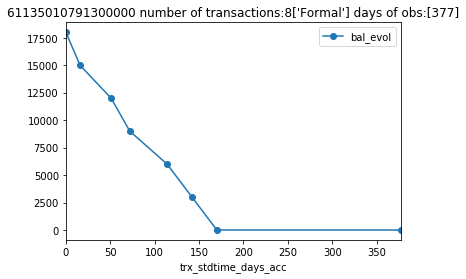

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
5684,0,0,1. Starting balance (today),Increase,NaN,18000.0,18000.0,18000.0
462245,16,16,3. Payments,Decrease,Outflow,3000.0,-3000.0,15000.0
17064,51,51,3. Payments,Decrease,Outflow,3000.0,-3000.0,12000.0
477427,72,72,3. Payments,Decrease,Outflow,3000.0,-3000.0,9000.0
477406,114,114,3. Payments,Decrease,Outflow,3000.0,-3000.0,6000.0
477416,142,142,3. Payments,Decrease,Outflow,3000.0,-3000.0,3000.0
477417,170,170,3. Payments,Decrease,Outflow,3000.0,-3000.0,0.0
8888,377,377,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


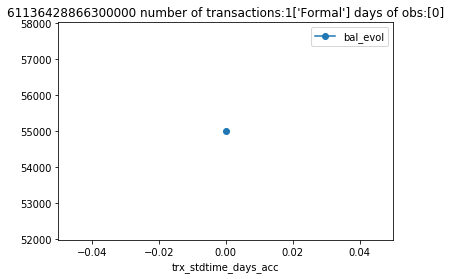

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
5832,4,0,1. Starting balance (today),Increase,NaN,55000.0,55000.0,55000.0


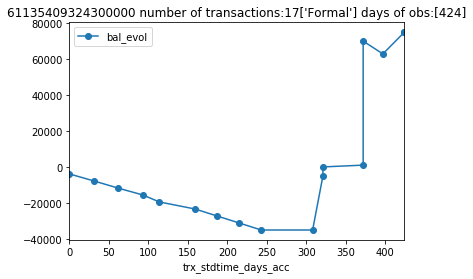

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
38843,0,0,3. Payments,Decrease,Outflow,3900.0,-3900.0,-3900.0
325255,31,31,3. Payments,Decrease,Outflow,3900.0,-3900.0,-7800.0
264592,61,61,3. Payments,Decrease,Outflow,3900.0,-3900.0,-11700.0
471784,93,93,3. Payments,Decrease,Outflow,3900.0,-3900.0,-15600.0
477413,114,114,3. Payments,Decrease,Outflow,3900.0,-3900.0,-19500.0
477428,159,159,3. Payments,Decrease,Outflow,3900.0,-3900.0,-23400.0
477423,187,187,3. Payments,Decrease,Outflow,3900.0,-3900.0,-27300.0
215681,215,215,3. Payments,Decrease,Outflow,3900.0,-3900.0,-31200.0
477403,243,243,3. Payments,Decrease,Outflow,3900.0,-3900.0,-35100.0
13668,308,308,1. Starting balance (today),Increase,NaN,0.0,0.0,-35100.0


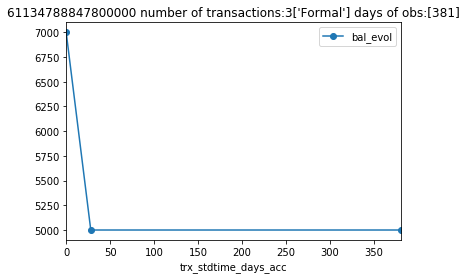

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
6803,0,0,1. Starting balance (today),Increase,NaN,7000.0,7000.0,7000.0
463541,28,28,3. Payments,Decrease,Outflow,2000.0,-2000.0,5000.0
9034,381,381,6. Closing Balance--End of last DQ,NaN,NaN,5000.0,0.0,5000.0


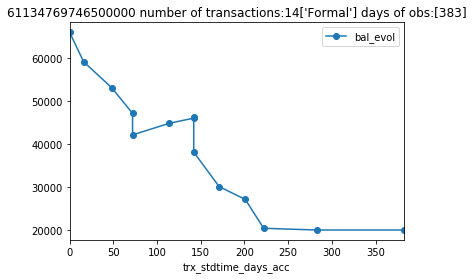

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
19769,28,0,1. Starting balance (today),Increase,NaN,66000.0,66000.0,66000.0
108017,44,16,3. Payments,Decrease,Outflow,6835.0,-6835.0,59165.0
127897,76,48,3. Payments,Decrease,Outflow,6000.0,-6000.0,53165.0
326770,100,72,3. Payments,Decrease,Outflow,6000.0,-6000.0,47165.0
468625,100,72,3. Payments,Decrease,Outflow,5000.0,-5000.0,42165.0
7993,142,114,5. Interest accruing,Increase,NaN,2700.0,2700.0,44865.0
23319,170,142,5. Interest accruing,Increase,NaN,1200.0,1200.0,46065.0
24789,170,142,4. Any known fees,Increase,NaN,200.0,200.0,46265.0
468993,170,142,3. Payments,Decrease,Outflow,8100.0,-8100.0,38165.0
307509,199,171,3. Payments,Decrease,Outflow,8000.0,-8000.0,30165.0


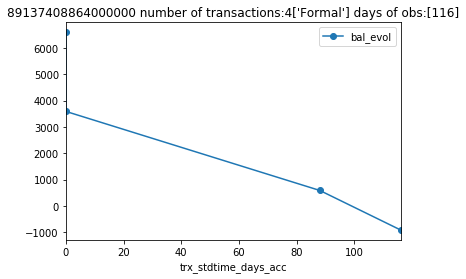

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
8751,138,0,1. Starting balance (today),Increase,NaN,6590.0,6590.0,6590.0
479661,138,0,3. Payments,Decrease,Outflow,3000.0,-3000.0,3590.0
446541,226,88,3. Payments,Decrease,Outflow,3000.0,-3000.0,590.0
480647,254,116,3. Payments,Decrease,Outflow,1500.0,-1500.0,-910.0


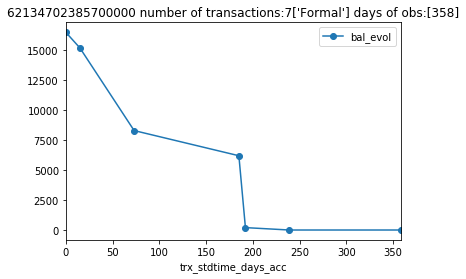

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
14141,54,0,1. Starting balance (today),Increase,NaN,16500.0,16500.0,16500.0
314230,69,15,3. Payments,Decrease,Outflow,1300.0,-1300.0,15200.0
77802,127,73,3. Payments,Decrease,Outflow,6900.0,-6900.0,8300.0
387060,239,185,3. Payments,Decrease,Outflow,2100.0,-2100.0,6200.0
307249,246,192,3. Payments,Decrease,Outflow,6000.0,-6000.0,200.0
196360,293,239,3. Payments,Decrease,Outflow,200.0,-200.0,0.0
9717,412,358,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


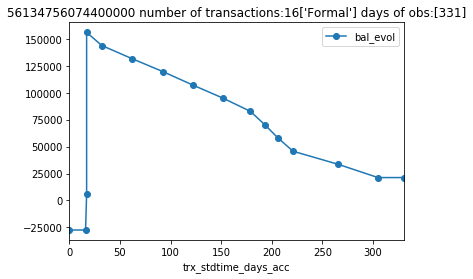

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
435589,51,0,3. Payments,Decrease,Outflow,27500.0,-27500.0,-27500.0
21980,67,16,1. Starting balance (today),Increase,NaN,0.0,0.0,-27500.0
10294,68,17,5. Interest accruing,Increase,NaN,33750.0,33750.0,6250.0
434432,68,17,2. New borrowinng (individual portion),Increase,Inflow,150000.0,150000.0,156250.0
461219,83,32,3. Payments,Decrease,Outflow,12250.0,-12250.0,144000.0
461282,113,62,3. Payments,Decrease,Outflow,12250.0,-12250.0,131750.0
217583,144,93,3. Payments,Decrease,Outflow,12250.0,-12250.0,119500.0
155446,173,122,3. Payments,Decrease,Outflow,12250.0,-12250.0,107250.0
342614,203,152,3. Payments,Decrease,Outflow,12250.0,-12250.0,95000.0
311901,230,179,3. Payments,Decrease,Outflow,12250.0,-12250.0,82750.0


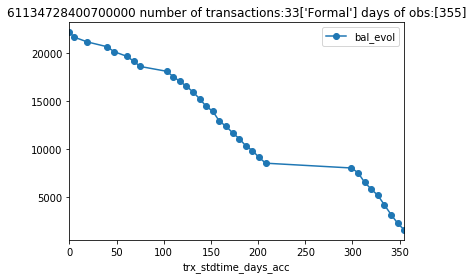

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
11086,9,0,1. Starting balance (today),Increase,NaN,22165.0,22165.0,22165.0
112931,14,5,3. Payments,Decrease,Outflow,500.0,-500.0,21665.0
142243,28,19,3. Payments,Decrease,Outflow,500.0,-500.0,21165.0
285007,49,40,3. Payments,Decrease,Outflow,500.0,-500.0,20665.0
78232,56,47,3. Payments,Decrease,Outflow,500.0,-500.0,20165.0
352436,70,61,3. Payments,Decrease,Outflow,500.0,-500.0,19665.0
321935,77,68,3. Payments,Decrease,Outflow,500.0,-500.0,19165.0
163814,84,75,3. Payments,Decrease,Outflow,550.0,-550.0,18615.0
100373,112,103,3. Payments,Decrease,Outflow,500.0,-500.0,18115.0
134322,119,110,3. Payments,Decrease,Outflow,550.0,-550.0,17565.0


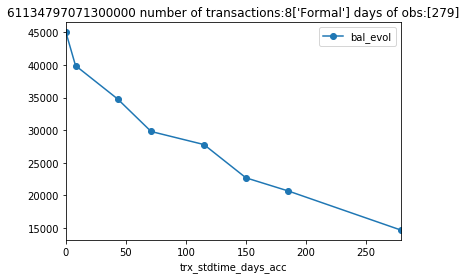

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
16240,2,0,1. Starting balance (today),Increase,NaN,45000.0,45000.0,45000.0
166326,10,8,3. Payments,Decrease,Outflow,5100.0,-5100.0,39900.0
66265,45,43,3. Payments,Decrease,Outflow,5100.0,-5100.0,34800.0
117020,73,71,3. Payments,Decrease,Outflow,5000.0,-5000.0,29800.0
286965,117,115,3. Payments,Decrease,Outflow,2000.0,-2000.0,27800.0
377145,152,150,3. Payments,Decrease,Outflow,5100.0,-5100.0,22700.0
36515,187,185,3. Payments,Decrease,Outflow,2000.0,-2000.0,20700.0
262639,281,279,3. Payments,Decrease,Outflow,6000.0,-6000.0,14700.0


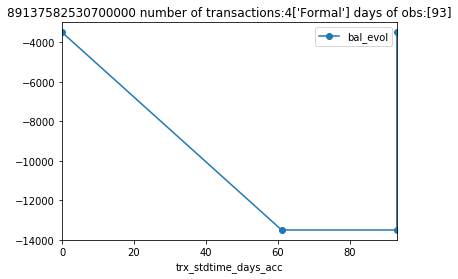

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
409253,259,0,3. Payments,Decrease,Outflow,3500.0,-3500.0,-3500.0
333898,320,61,3. Payments,Decrease,Outflow,10000.0,-10000.0,-13500.0
17606,352,93,6. Closing Balance--End of last DQ,NaN,NaN,-3500.0,0.0,-13500.0
21711,352,93,INCREASE--Unexplained balance adjustment,Increase,NaN,10000.0,10000.0,-3500.0


In [39]:
for acc in jl["account_ids"].unique():
    lna = jl[jl["account_ids"]==acc]
    lna = lna.sort_values("trx_stdtime_days_acc")
    
    #add transaction with direction for account
    lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))
    for index, row in lna.iterrows():
        if lna.loc[index,"trx_bsheet_direction"]=="Increase":
            lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
        elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
            lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
        elif row["trx_prx_purpose"]!="6. Closing Balance--End of last DQ":
            print("Error neither increase nor decrease, nor closing balance at index" + str(index) + ".")
    
    #add balance evolution
    lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))
    
    s=0
    for index,row in lna.iterrows():
        s+=lna.loc[index,"trx_val_dir"]
        lna.at[index,"bal_evol"]=s
        
    
    lna.plot(x="trx_stdtime_days_acc",y="bal_evol",marker='o', title=acc + " number of transactions:"+ str(lna.shape[0]) + str(lna["account_formal"].unique())+ " days of obs:" + str(lna["tot_acc_daysofobs"].unique()))
    plt.show()
    display(lna[["trx_stdtime_days_hh","trx_stdtime_days_acc","trx_prx_purpose","trx_bsheet_direction","trx_direction","trx_value_kes","trx_val_dir","bal_evol"]])
    

    